In [2]:
# Importamos todo lo necesario
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [3]:
# pip install -U scikit-learn

In [4]:
df = pd.read_csv('insurance.csv')
df.head()
#Nuestro target será la prima del seguro (charges)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Exploramos un poco el dataframe
df.info()
#numéricas tenemos age, bmi, children i charges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Cuántos valores únicos tenemos de cada columna??
df.nunique()
#sex i smoker podemos convertirla en variables binarias

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
#Estadísticos
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#Hay duplicados? (todas las columnas iguales)
df.duplicated().sum()

1

In [9]:
#Eliminamos duplicados
df.drop_duplicates(inplace=True)

In [10]:
#Volvemos a comprobar: hay duplicados? (todas las columnas iguales)
df.duplicated().sum()

0

# Preprocesado

In [11]:
#Preproceasado
#Numéricas: age, bmi, children >> son normales?

from scipy import stats
from scipy.stats import shapiro

# H0: la variables es normal
# H1: La variable no es normal

# si p-value > 0.05 se acepta la hipotesis nula HO


In [12]:
stats, p= stats.shapiro(df.age)
print(stats, p)
# devuelve la "fuerza" del descarte o aceptación  y el p-value

0.9448564052581787 6.211415541934325e-22


In [13]:
# El 0.9448 es la fuerza del descarte o aceptación de la hipótesis nula. En el caso de age, se decarta la H0 
# (el p-value) es muchísmo menor que 0.05 (fijemos que es un número e-22)y la fuerza el descarte es 0.99

In [14]:
#hay que hacer este import aquí (no entendemos porqué no funciona solo con el anterior)
from scipy.stats import shapiro

normal = []
no_normal = []
for name in ['age', 'bmi','children']:
    stats, p=shapiro(df[name])
    if p > 0.05:
        print(name, "es normal", stats, p)
        normal.append(name)
    else:
         print(name, "no es normal", stats, p)
         no_normal.append(name)
print("Normales:", normal)
print("No Normales", no_normal)

age no es normal 0.9448564052581787 6.211415541934325e-22
bmi no es normal 0.9938761591911316 2.5783332603168674e-05
children no es normal 0.8233991861343384 5.4062968267062164e-36
Normales: []
No Normales ['age', 'bmi', 'children']


<Axes: >

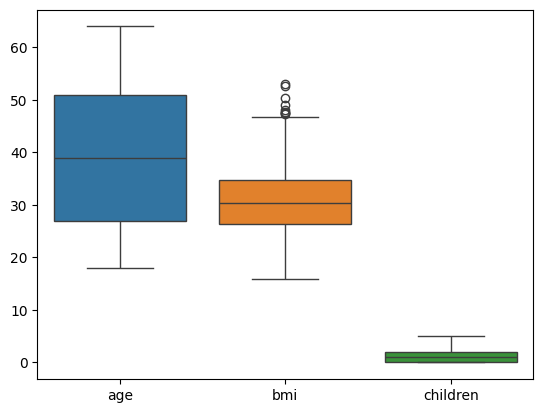

In [15]:
# Ninguna es nomral
# Si hubiera alguna Normal aplicamos StandardScaler() >> no es nuestro caso
# Aplicamos normalización a las No Normales
# Primero, chequear outliers con los boxplots
sns.boxplot(data=df[no_normal])


In [16]:
# bmi CON OUTLIERS >> aplicamos RobustScaler
# SIN OUTLIERS >> aplicamos MinMaxScaler
# Hacemos copia del dataset original dt_t : dataset transformado
df_t = df.copy()

In [17]:
# Importamos
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [18]:
rs = RobustScaler()
mms = MinMaxScaler()

In [19]:
df_t [['bmi']] = rs.fit_transform(df_t[['bmi']]) # para pasar 2 dimensiones doble []
df_t

,age,sex,bmi,children,smoker,region,charges
0,19,female,-0.297265,0,yes,southwest,16884.92400
1,18,male,0.400713,1,no,southeast,1725.55230
2,28,male,0.309156,3,no,southeast,4449.46200
3,33,male,-0.914982,0,no,northwest,21984.47061
4,32,male,-0.180737,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,0.067776,3,no,northwest,10600.54830
1334,18,female,0.180737,0,no,northeast,2205.98080
1335,18,female,0.766944,0,no,southeast,1629.83350
1336,21,female,-0.546968,0,no,southwest,2007.94500


In [20]:
df_t [['age']] = mms.fit_transform(df_t[['age']])
df_t

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,-0.297265,0,yes,southwest,16884.92400
1,0.000000,male,0.400713,1,no,southeast,1725.55230
2,0.217391,male,0.309156,3,no,southeast,4449.46200
3,0.326087,male,-0.914982,0,no,northwest,21984.47061
4,0.304348,male,-0.180737,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,male,0.067776,3,no,northwest,10600.54830
1334,0.000000,female,0.180737,0,no,northeast,2205.98080
1335,0.000000,female,0.766944,0,no,southeast,1629.83350
1336,0.065217,female,-0.546968,0,no,southwest,2007.94500


In [21]:
df_t [['children']] = mms.fit_transform(df_t[['children']])
df_t

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,-0.297265,0.0,yes,southwest,16884.92400
1,0.000000,male,0.400713,0.2,no,southeast,1725.55230
2,0.217391,male,0.309156,0.6,no,southeast,4449.46200
3,0.326087,male,-0.914982,0.0,no,northwest,21984.47061
4,0.304348,male,-0.180737,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,male,0.067776,0.6,no,northwest,10600.54830
1334,0.000000,female,0.180737,0.0,no,northeast,2205.98080
1335,0.000000,female,0.766944,0.0,no,southeast,1629.83350
1336,0.065217,female,-0.546968,0.0,no,southwest,2007.94500


In [22]:
#################################################
#################  8a sessió ####################
#################################################

In [23]:
df_t.head()


,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,-0.297265,0.0,yes,southwest,16884.92400
1,0.000000,male,0.400713,0.2,no,southeast,1725.55230
2,0.217391,male,0.309156,0.6,no,southeast,4449.46200
3,0.326087,male,-0.914982,0.0,no,northwest,21984.47061
4,0.304348,male,-0.180737,0.0,no,northwest,3866.85520


In [24]:
# Ahora nos faltan las categóricas >> onehotencoder, labelencoder, dummies, binarizer, etc

In [25]:
# Region tiene 4 valores >> podemos hacer labelencoder y pasará a ser 0, 1, 2, 3
df_t.region.unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [26]:
#Primero vemos como funciona dummies
dummies = ['sex']
pd.get_dummies(df_t[dummies], prefix='sex', drop_first=False).astype(int)
# df_t['sex'] = pd.get_dummies(data=df_t, columns='sex', prefix='sex')

,sex_female,sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [27]:
pd.get_dummies(df_t[dummies], prefix='sex', drop_first=True) # con True para eliminar multicolinealidad; así evitamos sobrerepresentación de variables
# que nos explican lo mismo

,sex_male
0,False
1,True
2,True
3,True
4,True
...,...
1333,True
1334,False
1335,False
1336,False


In [28]:
#Si lo hacemos con region
pd.get_dummies(df_t[['region']], prefix='sex', drop_first=False).astype(int)

,sex_northeast,sex_northwest,sex_southeast,sex_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [29]:
dummies = ['sex','smoker']
df_t [dummies]= pd.get_dummies(df_t[dummies], drop_first=True).astype(int)

In [30]:
# Importamos
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_t['region'] = le.fit_transform(df_t['region'])
df_t

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,-0.297265,0.0,1,3,16884.92400
1,0.000000,1,0.400713,0.2,0,2,1725.55230
2,0.217391,1,0.309156,0.6,0,2,4449.46200
3,0.326087,1,-0.914982,0.0,0,1,21984.47061
4,0.304348,1,-0.180737,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,1,0.067776,0.6,0,1,10600.54830
1334,0.000000,0,0.180737,0.0,0,0,2205.98080
1335,0.000000,0,0.766944,0.0,0,2,1629.83350
1336,0.065217,0,-0.546968,0.0,0,3,2007.94500


<Axes: >

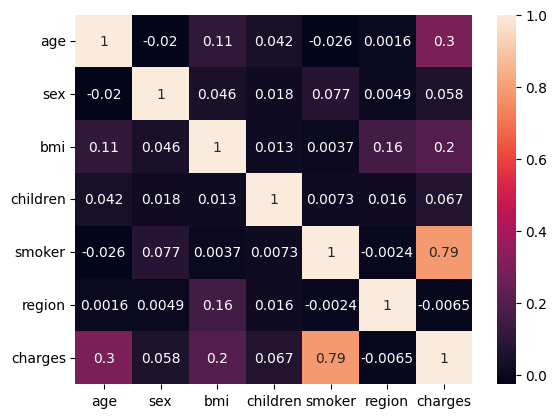

In [31]:
# REVISAR PORQUÉ NO SALE
corr = df_t.corr()
sns.heatmap(corr, annot=True)

# Modelos

In [32]:
#Importamos + entrenamos + predecimos
#REGRESIÓN
# Importamos los lineal models (regresión lineal, Lasso, Ridge)
from sklearn.linear_model import LinearRegression, Lasso, Ridge
# Regresión polinómica
from sklearn.preprocessing import PolynomialFeatures
# Árbol de decisión
from sklearn.tree import DecisionTreeRegressor
#Bosques aleatorios
from sklearn.ensemble import RandomForestRegressor
# Vecinos más cercanos
from sklearn.neighbors import KNeighborsRegressor
# Máquinas de Vectores de Soporte
from sklearn.svm import SVR
# Redes Neuronales
from sklearn.neural_network import MLPRegressor


In [33]:
#Entrenamos
# Train test 80/20
#importamos para poder dividir la muestra
from sklearn.model_selection import train_test_split
#
X = df_t.drop('charges', axis=1)
y = df_t['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


In [34]:
X_train.shape

(1069, 6)

In [35]:
X_test.shape

(268, 6)

In [36]:
#Aplicamos el modelo 
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [37]:
#Otro
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
# Haremos un bucle mejor para ejecutar todos a la vez
models = {
    'Regresor Lineal': LinearRegression(),
    'Polinomial' : None, #es diferente a los demás
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Arbol' : DecisionTreeRegressor(),
    'Random' : RandomForestRegressor(),
    'KNN' : KNeighborsRegressor(),
    'Vectores' : SVR(),
    'Redes' : MLPRegressor()
}
for name, model in models.items(): # para iterar sobre las claves y los valores ponemos items
    if name == 'Polinomial':
        pf = PolynomialFeatures(degree = 2)
        X_train_p = pf.fit_transform(X_train)
        pr = LinearRegression() #model
        pr.fit(X_train_p, y_train)
        X_test_p = pf.transform(X_test)
        y_pred = pr.predict(X_test_p)
    else: 
        #Resto de modelos
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)



c:\Users\tonim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
models

{'Regresor Lineal': LinearRegression(),
 'Polinomial': None,
 'Lasso': Lasso(),
 'Ridge': Ridge(),
 'Arbol': DecisionTreeRegressor(),
 'Random': RandomForestRegressor(),
 'KNN': KNeighborsRegressor(),
 'Vectores': SVR(),
 'Redes': MLPRegressor()}

In [40]:
data_y = {} # guardaremos predicciones de cada modelo en un diccionario para que luego sea más fácil crear un Dataframe


for name, model in models.items(): # para iterar sobre las claves y los valores ponemos items
    if name == 'Polinomial':
        pf = PolynomialFeatures(degree = 2)
        X_train_p = pf.fit_transform(X_train)
        pr = LinearRegression() #model
        pr.fit(X_train_p, y_train)
        X_test_p = pf.transform(X_test)
        y_pred = pr.predict(X_test_p)
    else: 
        #Resto de modelos
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
    #almaceno en el diccionario
    data_y[name] = y_pred
data_y # Nos muestra las predicciones

c:\Users\tonim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Regresor Lineal': array([30058.40486932, 13551.94321499,  2433.96649851, 13388.55574839,
        14944.64669831,  5847.99716202, 37016.31836514,  3371.20090886,
        15012.68886358,  8074.97020206, 12908.68997224, 36444.23096071,
         6593.89231596, 30737.95330405,  8746.83807505,  2205.57495715,
         1847.53879886, 34299.17819213, 13276.52316381, 14084.77129336,
        35039.00964495,  9274.78943941, 10108.86932144, -1090.86003093,
        12155.50491032, 12548.71560635, 13910.25662517,  2148.05208328,
         1765.29374157,  4305.20733266,  3492.81674816,  3775.42217461,
         4265.4774996 , 28829.05262302,   815.71999005, 14007.84183596,
         6989.28697345,  9978.61539744,  7928.95454838,  1953.67578497,
        33758.51885356,  9235.87992476,  4455.58788824,  7438.66893799,
        36037.31312444, 12411.96741331, 10361.15453678, 31763.48885516,
         9660.20615557,  5630.97971704, 11244.86937986,  7239.62880311,
         4308.65245684,  8135.6277316 , 37123

In [41]:
# añadimos el y_test a las predicciones
data_y['y_test'] = y_test

<Axes: >

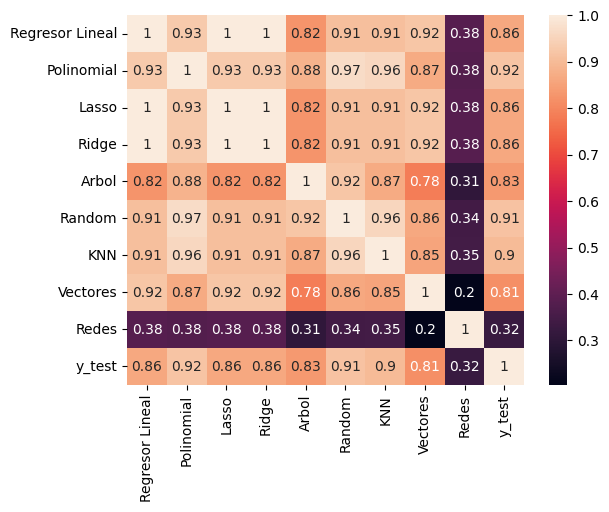

In [42]:
# Vemos cómo correlacionan los datos reales con las predicciones
df_y = pd.DataFrame(data_y)
corr_y = df_y.corr()
sns.heatmap(corr_y, annot=True)

<Axes: ylabel='Density'>

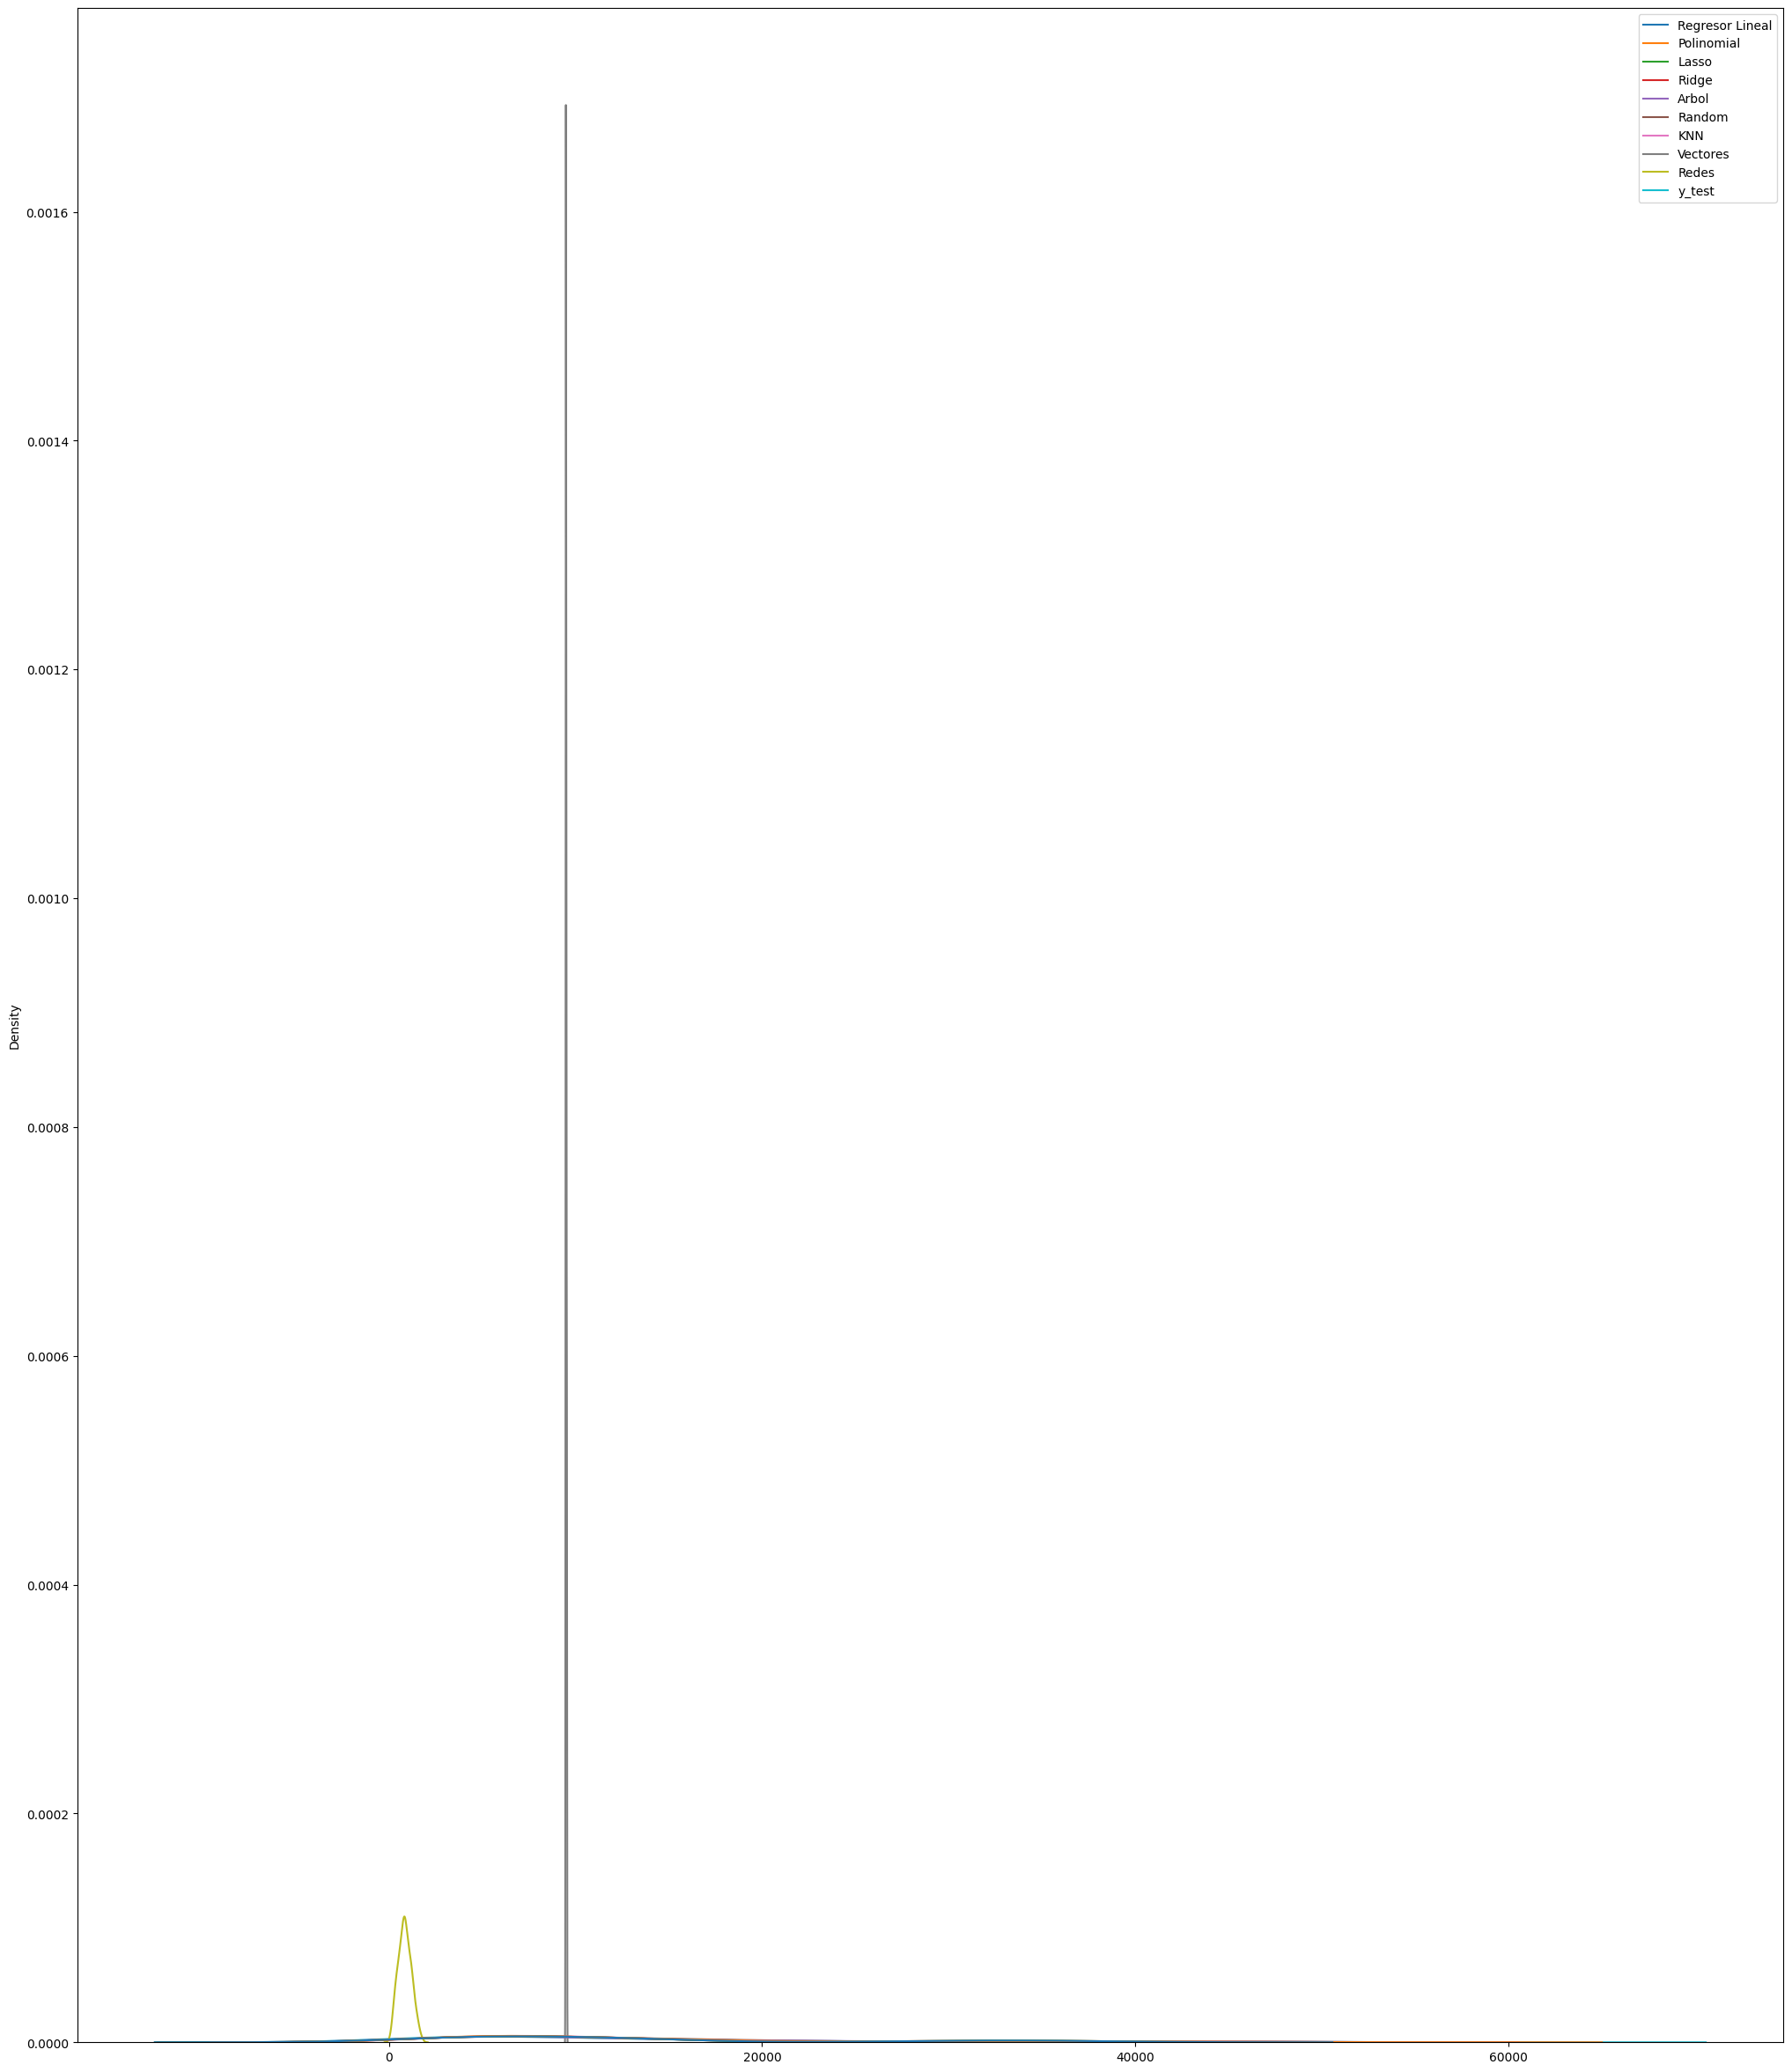

In [43]:
# línea de densidad
plt.figure(figsize=(25,30))
sns.kdeplot(df_y)

<Axes: ylabel='Density'>

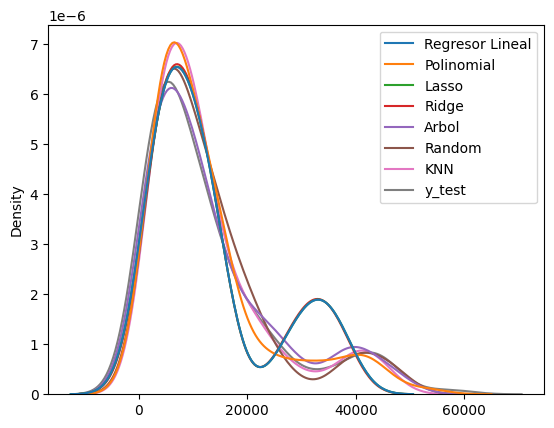

In [44]:
# Para mejorar la visualización eliminamos Redes y Vectores
sns.kdeplot(df_y[['Regresor Lineal', 'Polinomial','Lasso','Ridge','Arbol','Random','KNN','y_test']])

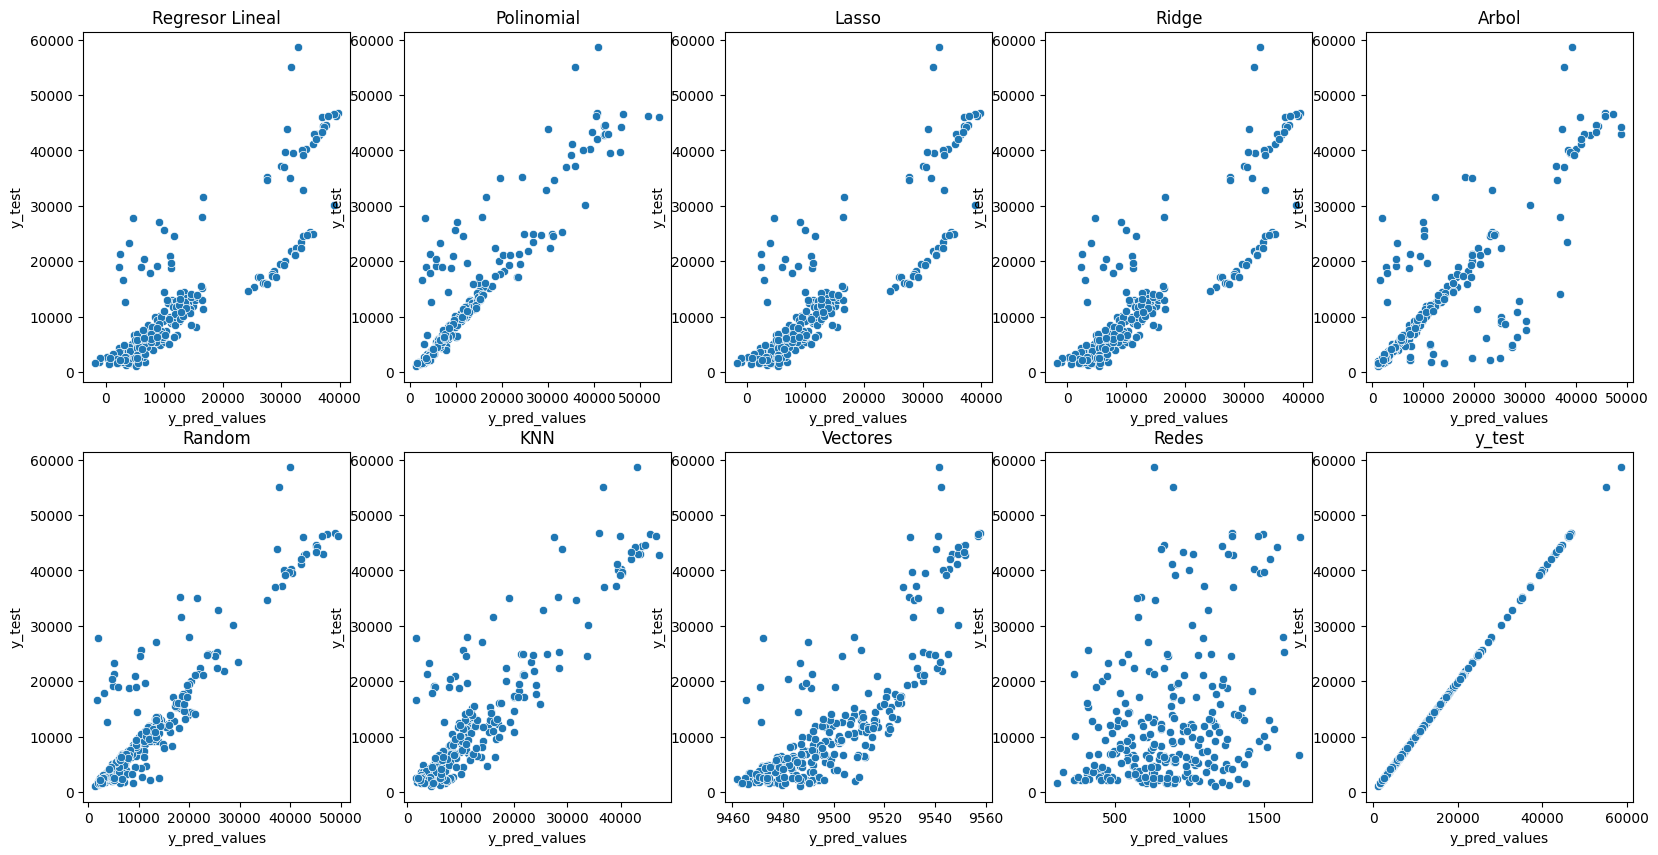

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
ax = axes.flatten() #aplanamos (1 sola dimensión el eje)

for i, (name, y_values) in enumerate(data_y.items()):
    sns.scatterplot(y = y_test, x = y_values, ax=ax[i])
    ax[i].set_title(f'{name}')
    ax[i].set_xlabel('y_pred_values')
    ax[i].set_ylabel('y_test')

### Próximo día: A partir del cálculo MSE (error cuadrático medio) i R^2 >>sirven para evaluar la calidad de los modelos.

In [46]:
#################################################
#################  9a sessió ####################
#################################################

In [47]:
# Redes y Vectores no deberán dar errores cuadrático medios elevados; el resto de modelos, dará valores parecidos. 
# R^2 cercanos a cero, no será buen modelo; cercano a 1, buen modelo
# Vamos a calculararlos
from sklearn.metrics import mean_squared_error
#
metrics = []
for col in models:
    metrics.append({
        'Modelo': col,
        'MSE':mean_squared_error(y_test, df_y[col])
    })
metrics


[{'Modelo': 'Regresor Lineal', 'MSE': 38230739.422579095},
 {'Modelo': 'Polinomial', 'MSE': 23418676.300792262},
 {'Modelo': 'Lasso', 'MSE': 38221369.83018478},
 {'Modelo': 'Ridge', 'MSE': 38144954.97867563},
 {'Modelo': 'Arbol', 'MSE': 48471109.4947745},
 {'Modelo': 'Random', 'MSE': 24578310.063112628},
 {'Modelo': 'KNN', 'MSE': 28918109.399945833},
 {'Modelo': 'Vectores', 'MSE': 159353636.0572749},
 {'Modelo': 'Redes', 'MSE': 289265674.3919081}]

In [48]:
#Lo convertimos a Pandas para verlo mejor
df_metrics = pd.DataFrame(metrics)
df_metrics

,Modelo,MSE
0,Regresor Lineal,3.823074e+07
1,Polinomial,2.341868e+07
2,Lasso,3.822137e+07
3,Ridge,3.814495e+07
4,Arbol,4.847111e+07
5,Random,2.457831e+07
6,KNN,2.891811e+07
7,Vectores,1.593536e+08
8,Redes,2.892657e+08


In [49]:
#Ahora lo hacemos con el r^2
from sklearn.metrics import mean_squared_error, r2_score
metrics = []
for col in models:
    metrics.append({
        'Modelo': col,
        'MSE':mean_squared_error(y_test, df_y[col]),
        'R^2': r2_score(y_test, df_y[col])
    })
metrics

[{'Modelo': 'Regresor Lineal',
  'MSE': 38230739.422579095,
  'R^2': 0.7430684411165445},
 {'Modelo': 'Polinomial', 'MSE': 23418676.300792262, 'R^2': 0.842613637616542},
 {'Modelo': 'Lasso', 'MSE': 38221369.83018478, 'R^2': 0.7431314099216562},
 {'Modelo': 'Ridge', 'MSE': 38144954.97867563, 'R^2': 0.7436449596781252},
 {'Modelo': 'Arbol', 'MSE': 48471109.4947745, 'R^2': 0.6742475319232807},
 {'Modelo': 'Random', 'MSE': 24578310.063112628, 'R^2': 0.8348202620557519},
 {'Modelo': 'KNN', 'MSE': 28918109.399945833, 'R^2': 0.8056544278162132},
 {'Modelo': 'Vectores', 'MSE': 159353636.0572749, 'R^2': -0.07094392481882039},
 {'Modelo': 'Redes', 'MSE': 289265674.3919081, 'R^2': -0.9440241485126151}]

In [50]:
#Lo convertimos a Pandas para verlo mejor
df_metrics = pd.DataFrame(metrics)
df_metrics

,Modelo,MSE,R^2
0,Regresor Lineal,3.823074e+07,0.743068
1,Polinomial,2.341868e+07,0.842614
2,Lasso,3.822137e+07,0.743131
3,Ridge,3.814495e+07,0.743645
4,Arbol,4.847111e+07,0.674248
5,Random,2.457831e+07,0.834820
6,KNN,2.891811e+07,0.805654
7,Vectores,1.593536e+08,-0.070944
8,Redes,2.892657e+08,-0.944024


[Text(0.6587657354655535, 0.9761904761904762, 'smoker <= 0.5\nsquared_error = 145922338.863\nsamples = 1069\nvalue = 13393.827'),
 Text(0.4162077645532491, 0.9285714285714286, 'age <= 0.554\nsquared_error = 36246019.011\nsamples = 851\nvalue = 8577.373'),
 Text(0.203417616200361, 0.8809523809523809, 'children <= 0.1\nsquared_error = 22170805.214\nsamples = 478\nvalue = 5568.225'),
 Text(0.08755609456478139, 0.8333333333333334, 'age <= 0.098\nsquared_error = 14469711.554\nsamples = 189\nvalue = 3739.436'),
 Text(0.05171354793421581, 0.7857142857142857, 'bmi <= 0.315\nsquared_error = 9219006.485\nsamples = 90\nvalue = 2423.618'),
 Text(0.028517348576012836, 0.7380952380952381, 'sex <= 0.5\nsquared_error = 658392.008\nsamples = 56\nvalue = 1892.162'),
 Text(0.010053148816686723, 0.6904761904761905, 'region <= 0.5\nsquared_error = 1167293.291\nsamples = 25\nvalue = 2237.898'),
 Text(0.0048134777376654635, 0.6428571428571429, 'bmi <= -0.169\nsquared_error = 3013010.585\nsamples = 7\nvalue =

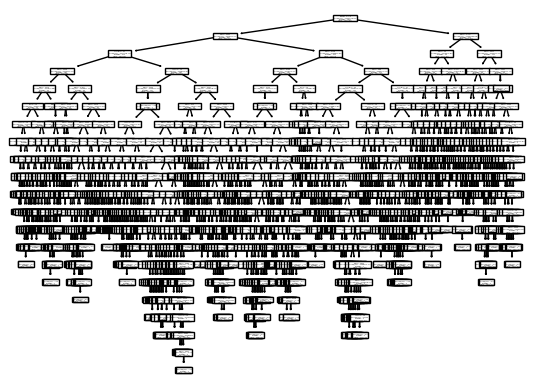

In [51]:
#El Random forest tiene menor error (MSE) y mayor ajuste (R^2 más cercano a 1)

# Para ver el árbol
from sklearn.tree import DecisionTreeRegressor,plot_tree
arbol = DecisionTreeRegressor()
arbol.fit(X_train, y_train)
plot_tree(arbol, feature_names=X_train.columns)

In [52]:
#Se puede limitar las ramas y niveles del árbol para que se vea mejor.

## Tunear los hiperparámetros (ajustar los modelos)

In [53]:
# Vamos hace el Random y ...
# Primero tendremos que saber qué parámetros tiene cada modelo
lr = LinearRegression()
rf = RandomForestRegressor()
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestRegressor()

In [54]:
# Para saber qué parámetros utilizó
lr.get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [55]:
# Random Forest tiene muchos más parámetros
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [56]:
#Importamos las librerías que nos permite "jugar" con las posibles combinaciones de parámetros

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [57]:
# Creamos un diccionario con los posibles valores de los parámetros de Lineal Regression
lr_param = {'copy_X': [True, False], 
            'fit_intercept': [True, False], 
            'n_jobs': [None,1,2],
            'positive': [True, False]}
#Aplicamos la técnica de ajuste de parámetros
lr_grid = GridSearchCV(LinearRegression(), lr_param)
lr_grid.fit(X_train, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None, 1, 2],
                         'positive': [True, False]})

In [58]:
lr_grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [59]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [60]:
#Los mejores son los mismos que los de por defecto.

In [61]:
#Vamos ahora con Random Forest
rf_params = {'bootstrap': [True, False],
  'criterion': ['squared_error', 'absolurte_error','friedman_mse','poisson'],
 'max_depth': [None,5, 30, 100, 200],
 'max_features': [1.0, 'sqrt', 'log2', None],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 3, 4],
 'n_estimators': [0, 10, 40, 70, 100],
 'warm_start': [False, True]

}
rf_random= RandomizedSearchCV(RandomForestRegressor(), rf_params)
rf_random.fit(X_train,y_train)

c:\Users\tonim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tonim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tonim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\tonim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolurte_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [None, 5, 30, 100, 200],
                                        'max_features': [1.0, 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [0, 10, 40, 70, 100],
                                        'warm_start': [False, True]})

In [62]:
#comparamos best_params con los parámetros por defecto
rf_random.best_params_

{'warm_start': True,
 'n_estimators': 40,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 200,
 'criterion': 'poisson',
 'bootstrap': False}

In [63]:
# los parámetros por defecto eran:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [64]:
# El mejor estimador será el modelo que estima con los mejores parámetros
# El el regresor lineal son iguales.
# Para el random forest son distintos, los por params por defecto y los mejores
rf_best = rf_random.best_estimator_

In [65]:
#Hacemos las predicciones con el mejor modelo
y_pred_rf_best = rf_best.predict(X_test)

In [66]:
# Añadimos las predicciones de este modelo para poder comparar
df_y['RF Best'] = y_pred_rf_best
df_y

,Regresor Lineal,Polinomial,Lasso,Ridge,Arbol,Random,KNN,Vectores,Redes,y_test,RF Best
203,30058.404869,35768.041133,30061.634720,29988.827939,36149.483500,38447.602076,39182.901062,9532.436319,1099.785426,37133.89820,36667.102858
337,13551.943215,15803.917749,13546.395953,13520.405718,14349.854400,19718.518767,11619.980570,9507.856086,884.924646,13937.66650,16853.189881
102,2433.966499,4354.500905,2444.479054,2528.108255,7323.734819,5148.447077,3716.159604,9491.384217,225.388490,21344.84670,5377.009117
283,13388.555748,13619.278814,13386.654153,13371.477826,10601.632250,12997.600081,15087.863562,9521.669604,511.233344,11879.10405,13043.671504
642,14944.646698,14997.402875,14940.618799,14925.172438,13143.336650,13148.512303,11844.044260,9524.839616,760.680872,13143.86485,13646.860990
...,...,...,...,...,...,...,...,...,...,...,...
1142,9142.313262,10337.246979,9147.897191,9144.132385,9991.037650,13423.874701,13954.226154,9489.802825,724.173725,27117.99378,12429.583921
565,2509.668356,3691.156507,2520.991482,2602.792159,2130.675900,2335.742875,2443.936690,9473.795005,467.241709,2128.43105,3140.131679
511,5361.758359,3506.375918,5367.942923,5439.765881,19673.335730,5121.336945,1992.405140,9473.835086,1039.407051,2498.41440,2783.544128
266,29204.836253,15006.023608,29200.317676,29090.231544,19444.265800,19638.117405,20740.749380,9526.199562,1045.042604,17179.52200,21882.056544


<Axes: ylabel='Density'>

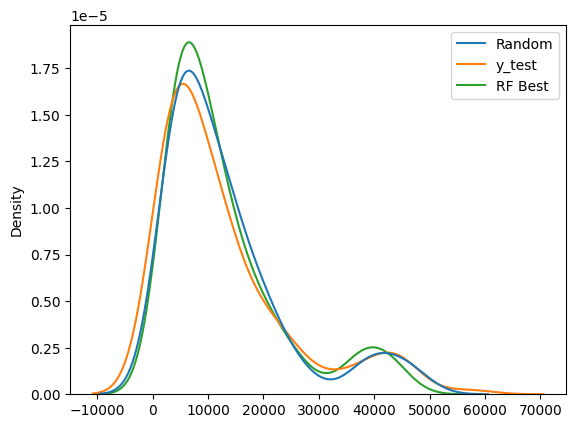

In [67]:
# Para mejorar la visualización eliminamos Redes y Vectores
# Aparentemente parece que el RF Best no mejora
sns.kdeplot(df_y[['Random','y_test','RF Best']])

In [68]:
#Volvemos a calcular las métricas del modelos para ver si es mejor
metrics.append({
        'Modelo': 'RF Best',
        'MSE':mean_squared_error(y_test, df_y['RF Best']),
        'R^2': r2_score(y_test, df_y['RF Best'])
 })
df_metrics=pd.DataFrame(metrics)
df_metrics

,Modelo,MSE,R^2
0,Regresor Lineal,3.823074e+07,0.743068
1,Polinomial,2.341868e+07,0.842614
2,Lasso,3.822137e+07,0.743131
3,Ridge,3.814495e+07,0.743645
4,Arbol,4.847111e+07,0.674248
5,Random,2.457831e+07,0.834820
6,KNN,2.891811e+07,0.805654
7,Vectores,1.593536e+08,-0.070944
8,Redes,2.892657e+08,-0.944024
9,RF Best,2.429893e+07,0.836698


# Podemos hacer una validación cruzada (Cross Validation) de los modelos CON el universo COMPLETO de los datos >> K-fold u otros;
# ¿¿Es bueno el modelo para cualquier combinación del split de datos train - test?? ¿¿ Es ROBUSTO el modelo??


In [69]:
# Empezamos con rf best y la métrica r^2
from sklearn.model_selection import KFold, cross_val_score
r2_rf_best = cross_val_score(rf_best, X, y, cv=8, scoring='r2')

In [70]:
# En general, valores por encima de 0,7 son buenos valores

In [71]:
# Miramos el arbol original
r2_arbol= cross_val_score(arbol, X, y, cv=8, scoring='r2')

In [72]:
# Miramos la regresión lineal
r2_lr = cross_val_score(lr, X, y, cv=8, scoring='r2')

In [73]:
# Calculamos la media de r^2 para cada modelo:
print(
    'RF Best', r2_rf_best.mean(),
    '\nArbol:', r2_arbol.mean(),
    '\nLR:', r2_lr.mean()
)

RF Best 0.8407783983676594 
Arbol: 0.7090961007347075 
LR: 0.7430191796786368


In [74]:
# El más robusto/mejor, es el RF Best

# Empezamos CLASIFICACIÓN (predicción de variables categóricas)

In [75]:
# Hacemos las importaciones de los modelos de clasificación
from sklearn.linear_model import LogisticRegression #OJO! aunque su nombre es Regression, se utiliza para CLASIFICAR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [76]:
# Trabajaremos con los datos del TITANIC. Nuestro target será Survived
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
# Vamos a "limpiar" nuestro dataset
# Eliminamo la columna PassengerId que no nos aporta nada
df = df.drop('PassengerId', axis=1, inplace=False)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [79]:
# Los nulos
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [80]:
df[df.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [81]:
#Algunos gráficos para entender los datos
df.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

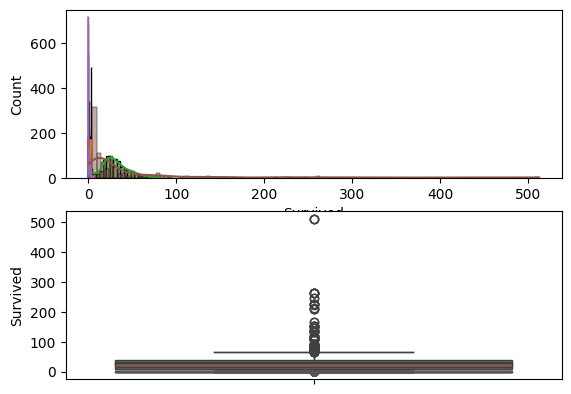

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=1) # Revisa porque no salen bien (se superponen)
ax = axes.flatten()
for column in ['Survived', 'Pclass','Age', 'SibSp','Parch','Fare']:
    sns.histplot(df[column], kde=True, ax=ax[0])
    sns.boxplot(df[column], ax=ax[1])

In [ ]:
##############################################
################## 10ª sessió ################
##############################################